### Part 1 run on Google Collab
This part contains EDA w/  Clustering & Feature Mining & Interpretation.

Part 2 containing model training and evaluation would in another file.

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/data.csv')
data.drop(data.columns[[0]], axis=1, inplace=True)
# The target variable
data['satisfaction']=data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
new_df = data.copy() #For clustering & label generation

In [ ]:
# Checking the missing values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

([<matplotlib.patches.Wedge at 0x7ff61aacf5d0>,
 [Text(-0.686115188166815, 3.2278856777412077, 'Neutral or dissatisfied'),
  Text(0.686115188166816, -3.2278856777412077, 'Satisfied')],
 [Text(-0.37424464809098995, 1.7606649151315676, '56.7%'),
  Text(0.3742446480909905, -1.7606649151315676, '43.3%')])

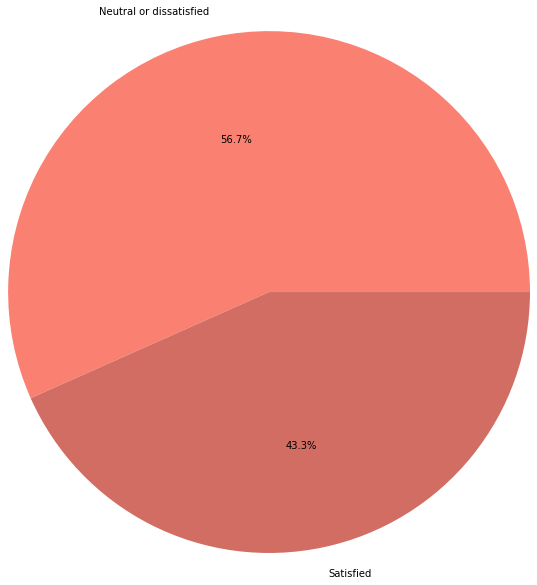

In [ ]:
# Checking the distribution of target variables
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("dark:salmon_r"), autopct = '%1.1f%%',radius=3)

Our dataset is quite balanced that the satisfied surveys and Neutral or dissatisfied surveys are not dramatically unequal. 

In [ ]:
def correlation_matrix(data):
    corr = data.corr().round(2)

    # Mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set figure size
    f, ax = plt.subplots(figsize=(20, 20))

    # Define custom colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap
    corr=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.tight_layout()
    return corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


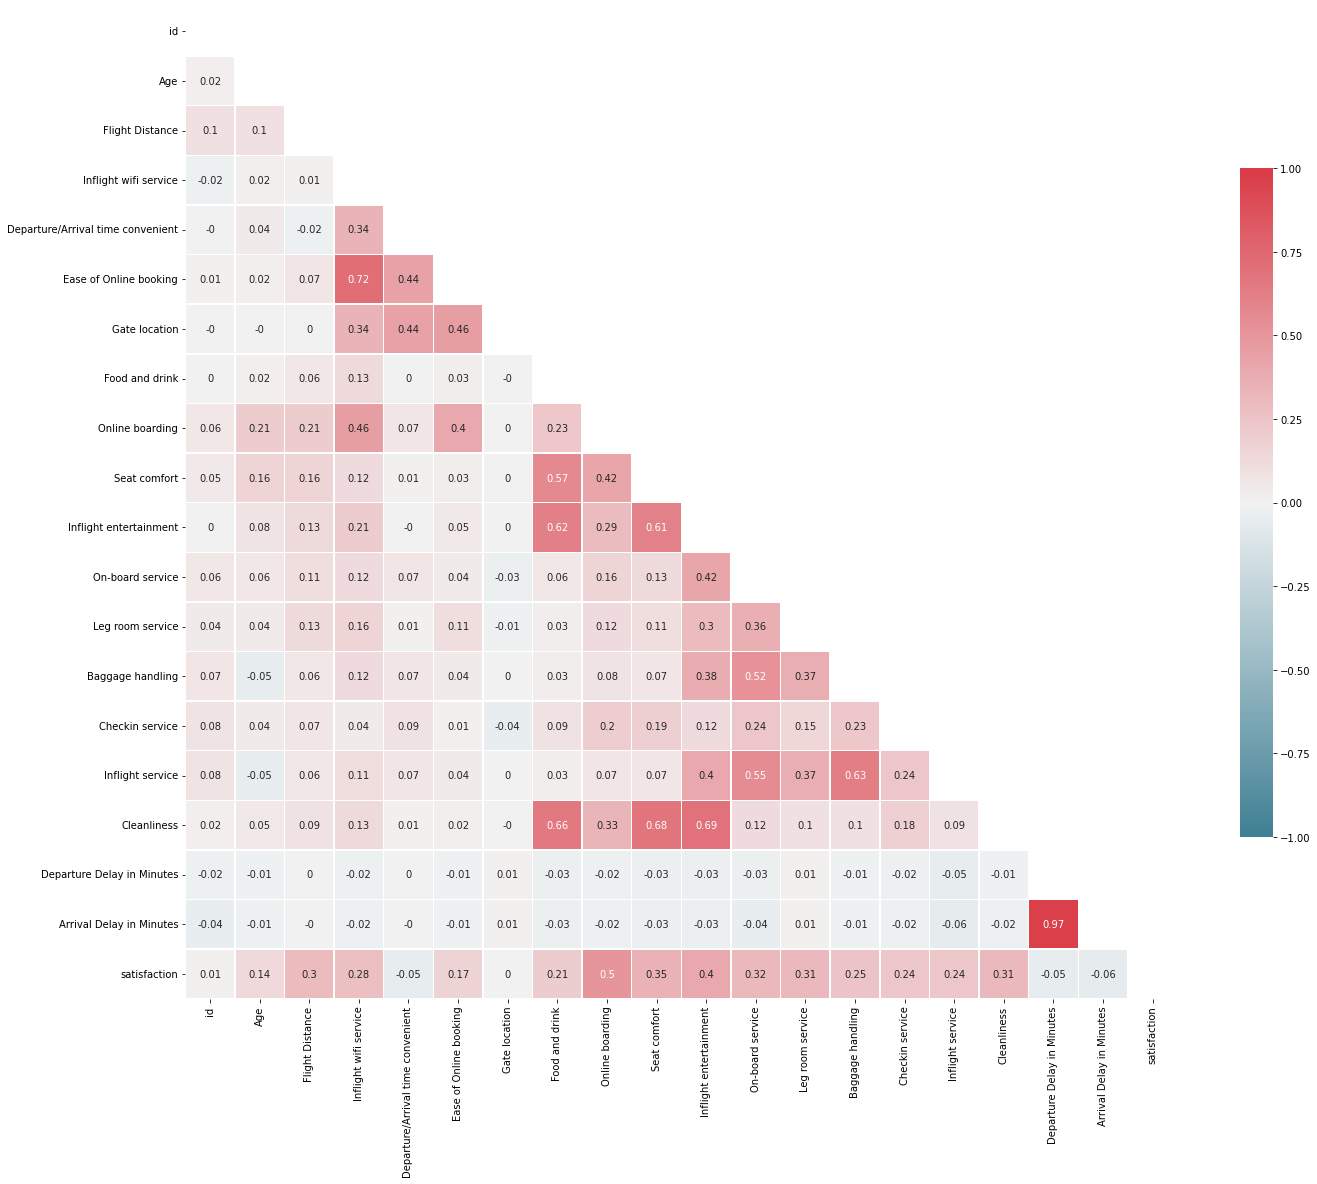

In [ ]:
# Check the correlation between features to get some insights for feature mining
correlation_matrix(data)

From diagram above, we observed that ID, Departure/Arrival time convinient, Gate location, Departure Delay in Minutes and Arrival Delay in Minutes are not highly correlated with satifaction. So we will either perform feature engineering or drop these columns.

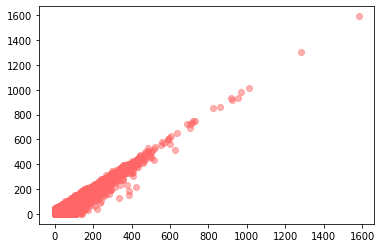

In [ ]:
# Observing the 0.97 correlation between Arrival Delay in Minutes & Departure Delay in Minutes, check their distibution
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5,c='#FF6666')

In [ ]:
# ID is non-related to satisfication classfication, drop it
data.drop(data.columns[[0]], axis=1, inplace=True) #drop id column

In [ ]:
# categorical 
cat = ['Gender','Customer Type','Type of Travel','Class']

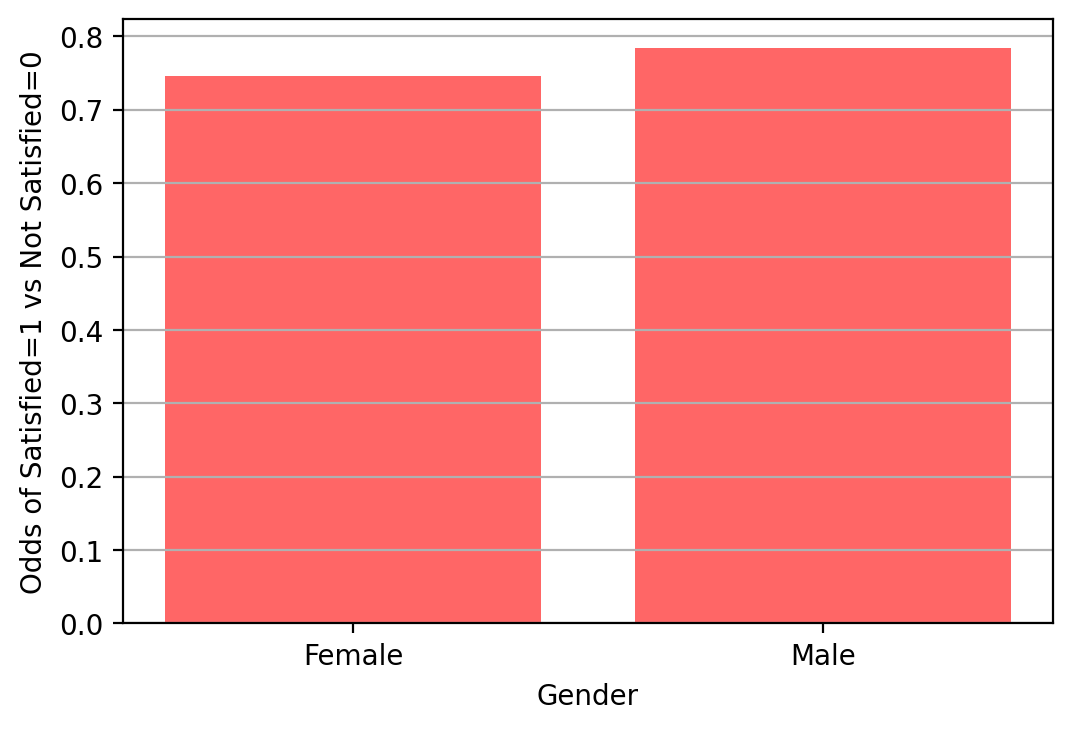

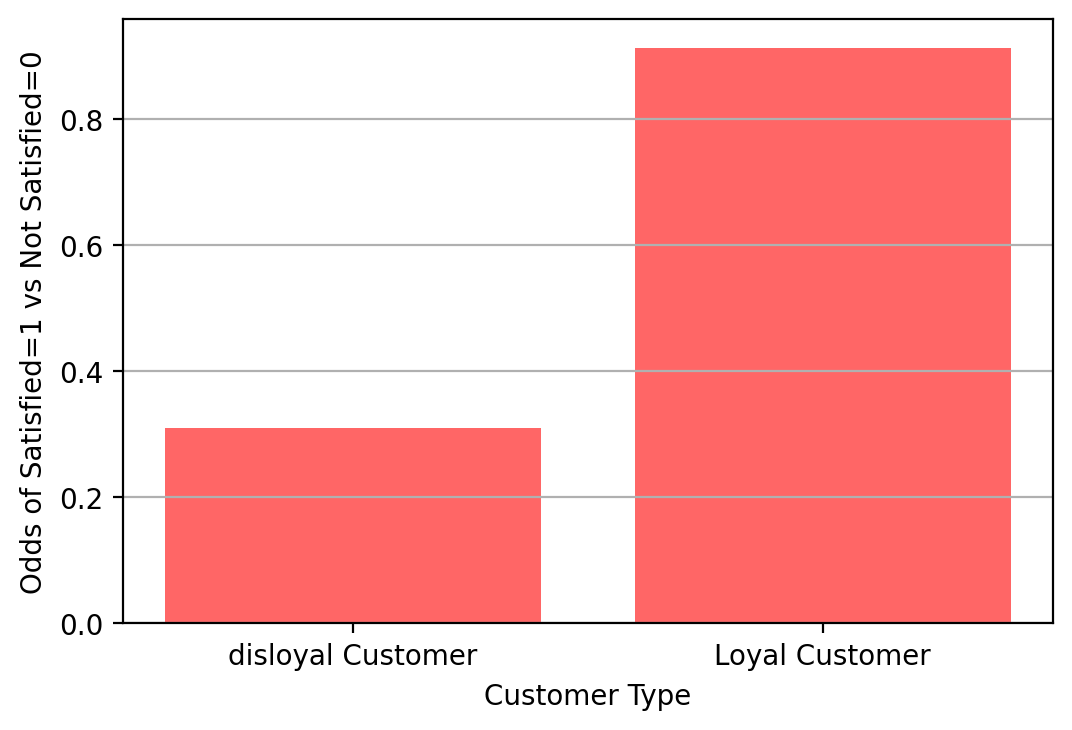

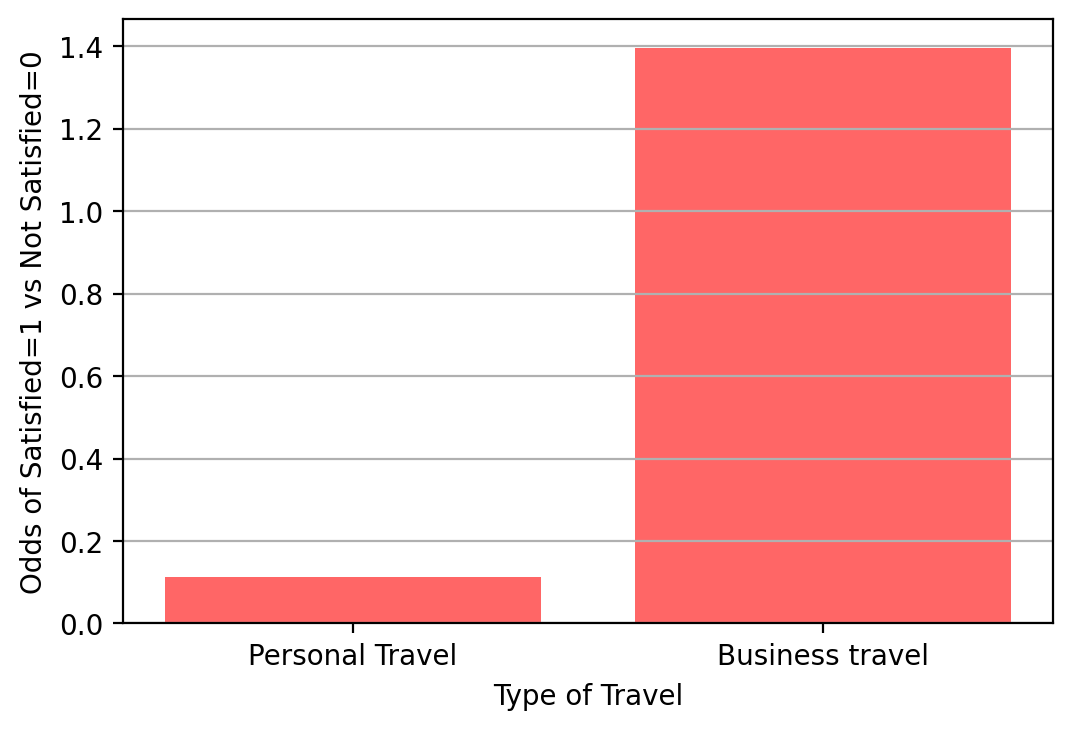

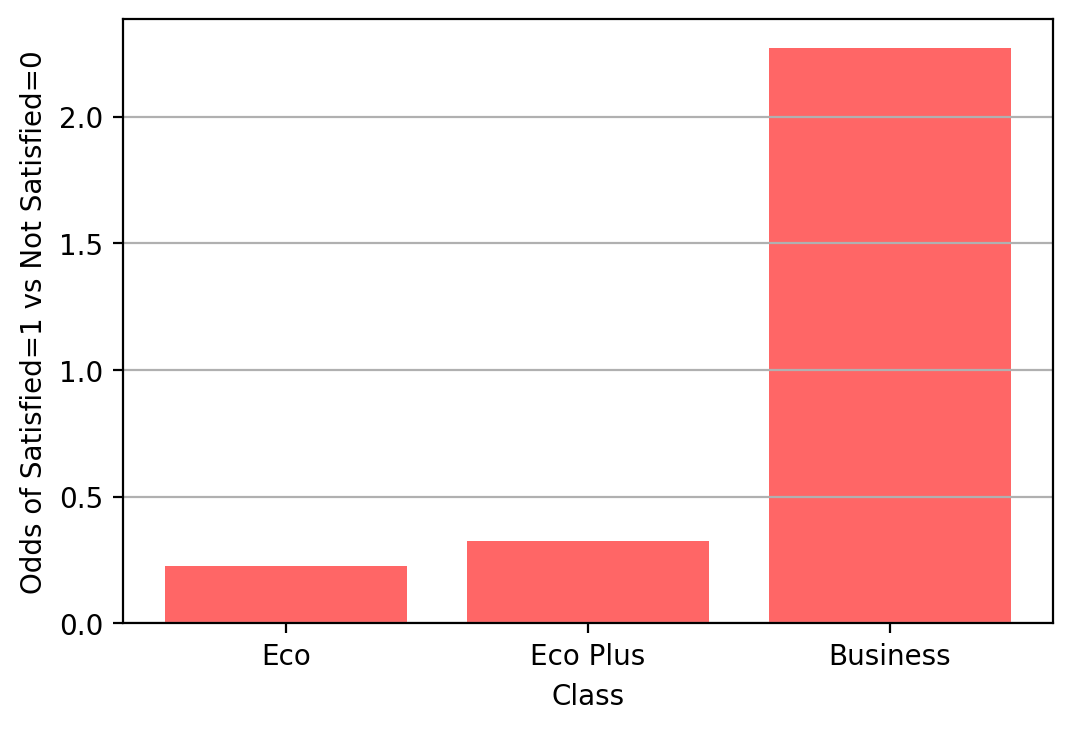

In [ ]:
# check the odds by below for categorical varibles 
cat = ['Gender','Customer Type','Type of Travel','Class']
for col in cat:
    xtab = pd.crosstab(index = data[col], columns = data['satisfaction'])
    
    xtab.reset_index(inplace = True)
    xtab['Odds'] = xtab[1] / xtab[0]
   
    xtab.sort_values(by = 'Odds', inplace = True)
    plt.figure(dpi = 200)
    plt.bar(xtab[col], xtab['Odds'], color = '#FF6666')
    plt.xlabel(col)
    plt.ylabel('Odds of Satisfied=1 vs Not Satisfied=0')
    plt.xticks(xtab[col])
    plt.grid(axis ='y')
    plt.show()


The odds of an Event is the ratio by dividing the probability of the Event occurring by the probability of the Non-Event occurring. And observing the odds plot we can see that customer type, type of travel, and class have very different distribution of satisfaction. 

In [ ]:
# View numerical features distribution with respect to the satisfaction situation
yName = 'satisfaction'
num = ['Age', 
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

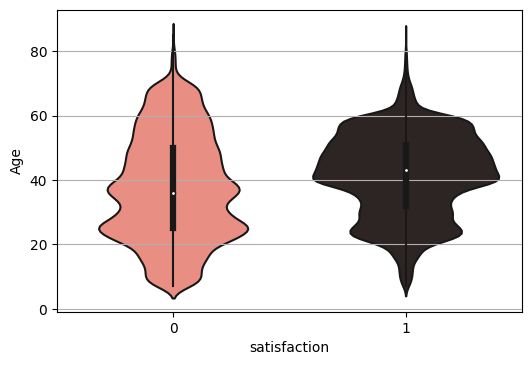

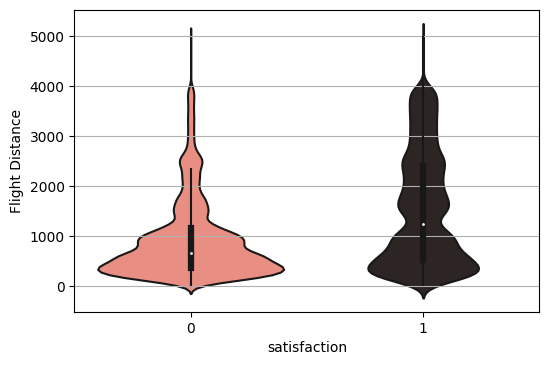

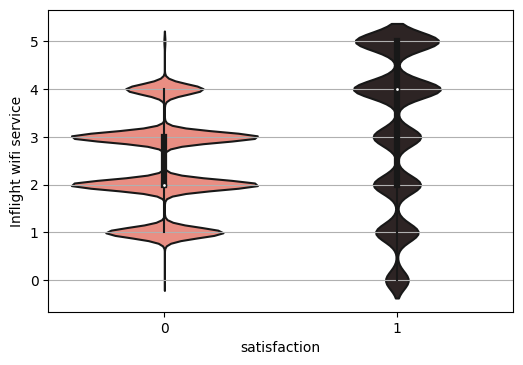

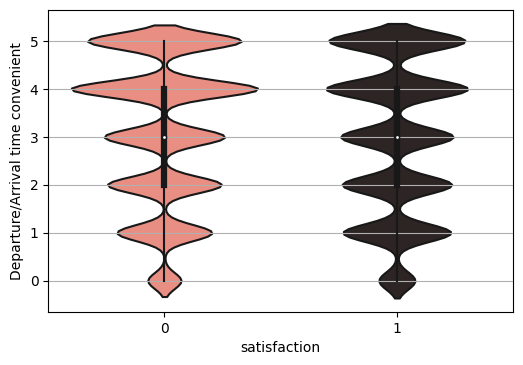

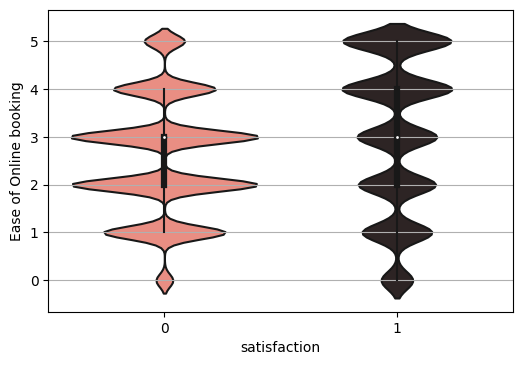

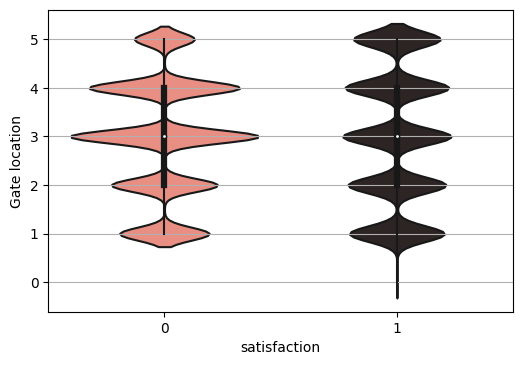

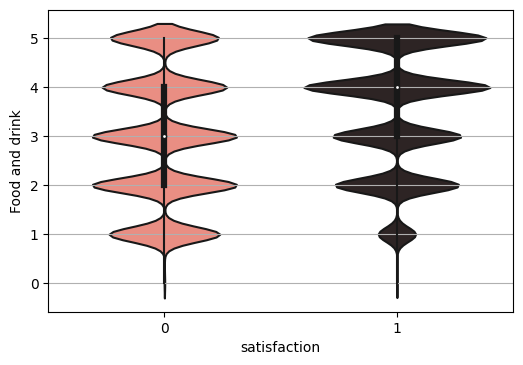

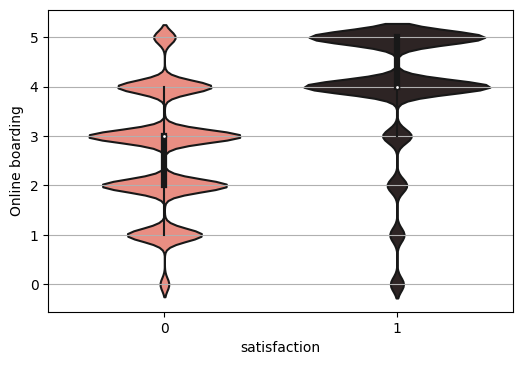

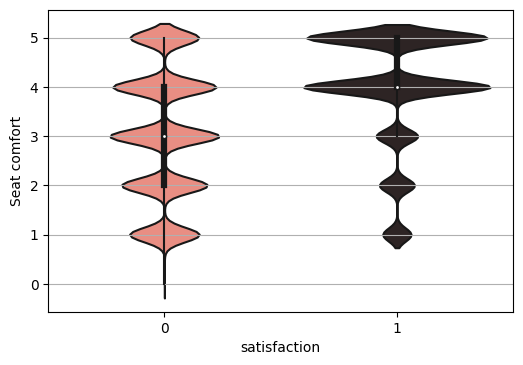

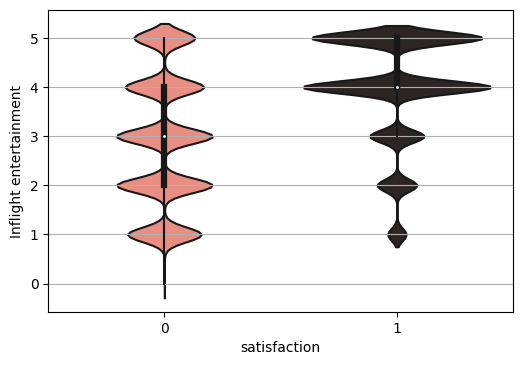

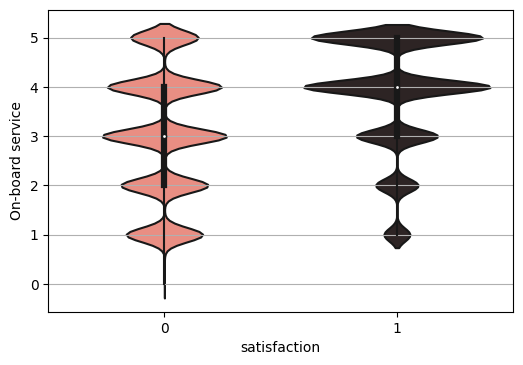

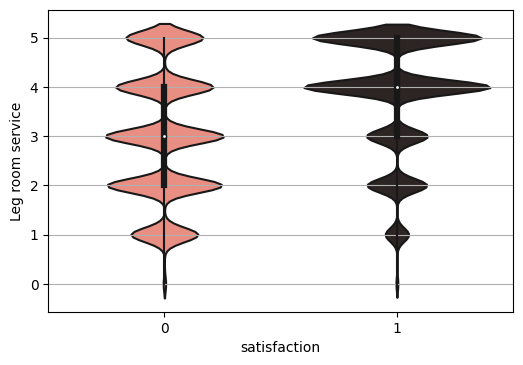

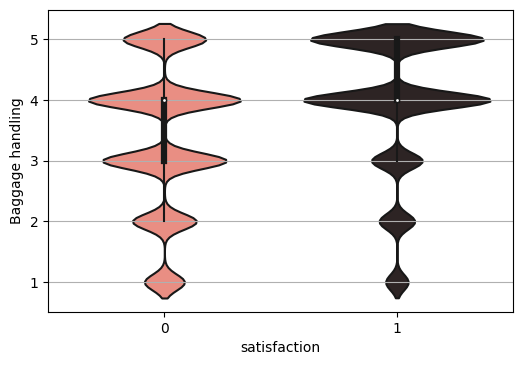

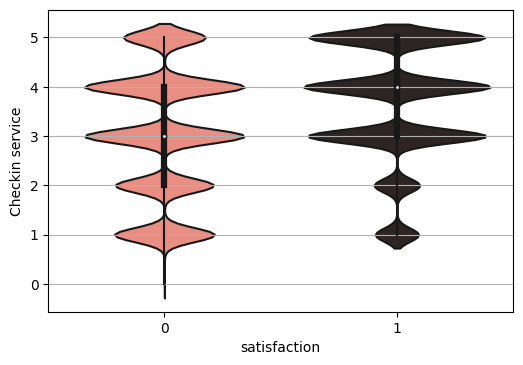

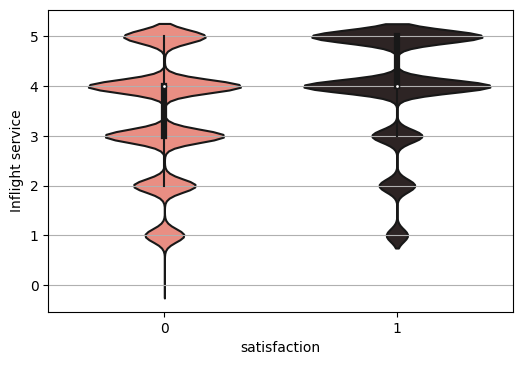

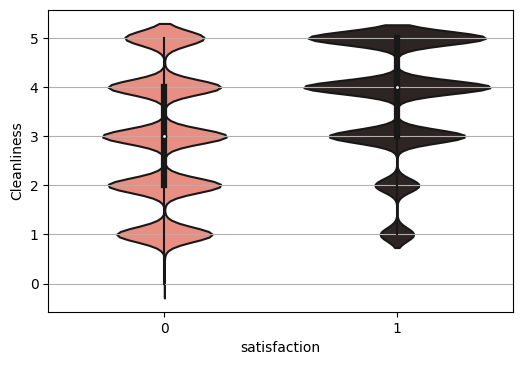

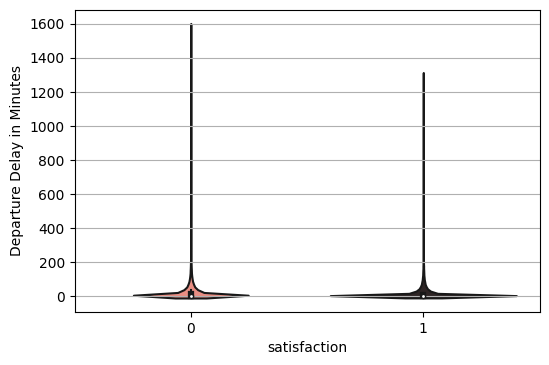

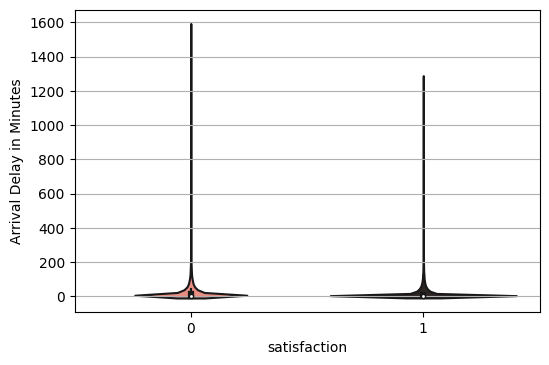

In [ ]:
# Voilin plot achieving the goal set above
for pred in num:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 100)
    ax = sns.violinplot(x=yName, y=pred, data=data, palette='dark:salmon_r')
    #ax.violinplot(dataset=df[pred], by = yName, vert = False)
    ax.set_xlabel(yName)
    ax.set_ylabel(pred)
    ax.yaxis.grid(True)
    plt.suptitle("")
    plt.title("")
    plt.show()

The distribution of cleanliness between satisfied people and neutral/unsatisfied people is different that satisfied people usually gave higher ratings for cleanliness. Other Detailed interpretation is in the slides.

Another important take-away from these voilin plots is that although subjective scorings like cleanliness are numerical, but they are actually categorical data with numerical values. But since they are hierarchical, we would not change their data type to category and not get gummies. 

In [ ]:
# Now all the categorical variables are listed as below
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
# I want to take a look at their internal distributions, mainly the percentages they each took from pir charts
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

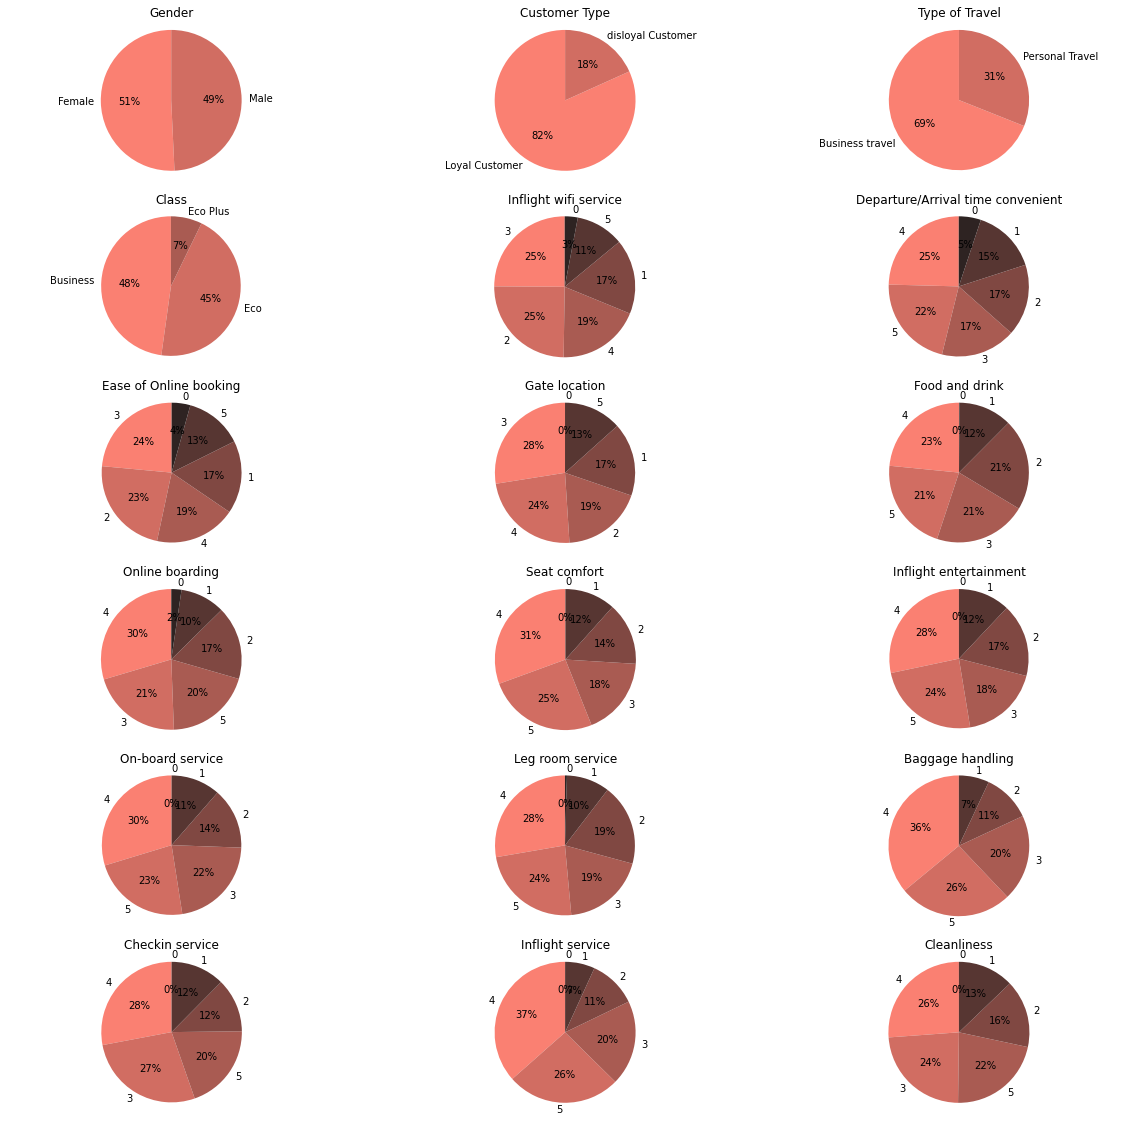

In [ ]:
# Plot the pie charts
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    # Deciding the axes 
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("dark:salmon_r"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Observing the pie charts, the number of men and women in this sample is approximately the same.
The vast majority of the airline's customers are repeat customers.
Most of our clients flew for business rather than personal reasons.
About half of the passengers were in business class.
More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5).
More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5).
More explainations and insights will be in the slides.

### Check how features affect each other with selected features.

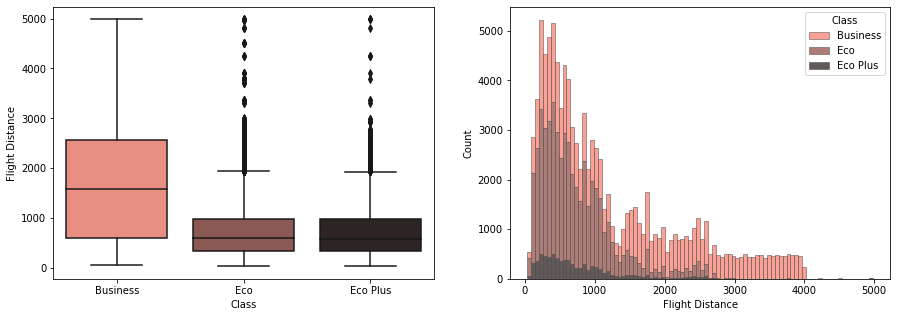

In [ ]:
# How flight distance affect the class distributions
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

Long distance flight passengers tend to but business class more.

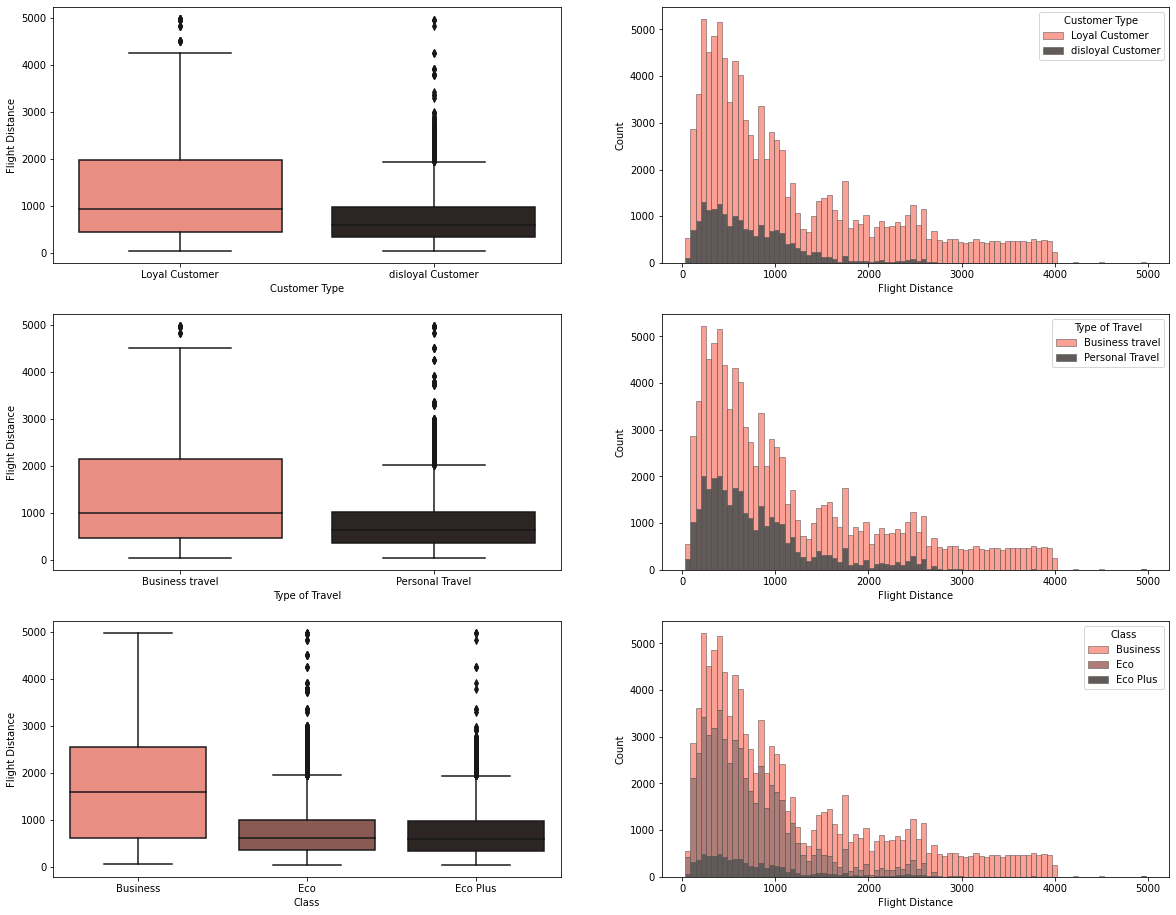

In [ ]:
# How flight distance affect inflight entertainment & leg room services
f, ax = plt.subplots(3, 2, figsize = (20,16))
sns.boxplot(x = "Customer Type", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Customer Type", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Type of Travel", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Type of Travel", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
sns.boxplot(x = "Class", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[2, 0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[2, 1])

Long distance flight passengers gave higher ratings for both inflight entertainment & leg room services.

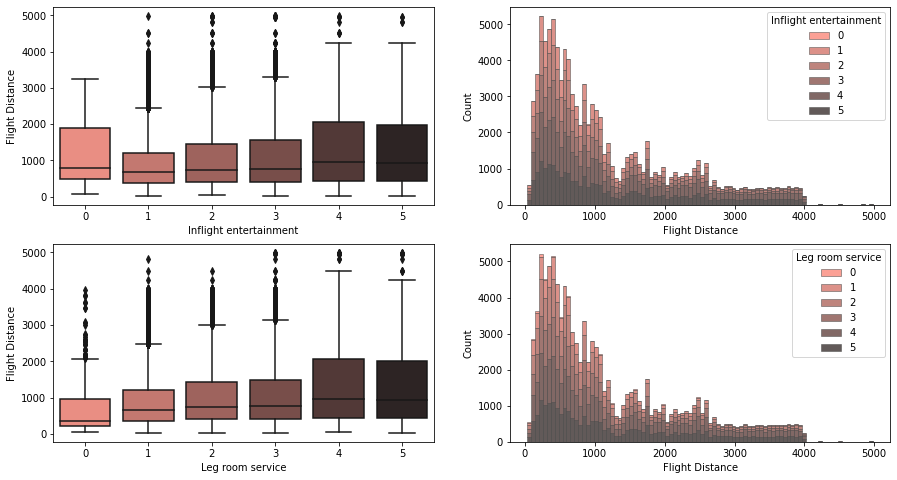

In [ ]:
# How flight distance affect inflight entertainment & leg room services
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "dark:salmon_r", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

# Clustering

In [ ]:
new_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
# Handling the data for further analysis
new_df['Arrival Delay in Minutes'] = new_df['Arrival Delay in Minutes'].fillna(0)
new_df['Gender'] = new_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 
new_df['Is_Loyal_Customer'] = new_df['Customer Type'].apply(lambda x:1 if x=='Loyal Customer' else 0)
new_df = new_df.drop('Customer Type', axis = 1)
new_df['Is_Business_Travel'] = new_df['Type of Travel'].apply(lambda x:1 if x=='Business travel' else 0)
new_df = new_df.drop('Type of Travel', axis = 1)
new_df['Class'] = new_df['Class'].apply(lambda x: 2 if x == 'Business' else 1 if x== 'Eco Plus' else 0)


In [ ]:
new_df.head(5)

,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Is_Loyal_Customer,Is_Business_Travel
0,70172,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,1,0
1,5047,0,25,2,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,1
2,110028,1,26,2,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,1,1
3,24026,1,25,2,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,1,1
4,119299,0,61,2,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,1,1


In [ ]:
not_feedback = ['Gender', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 
                'Arrival Delay in Minutes', 'Is_Loyal_Customer', 'Is_Business_Travel',
                'Class', 'satisfaction']
#satisfaction added here for ploting different groups, see whether there is a trend

In [ ]:
nf = new_df[not_feedback]

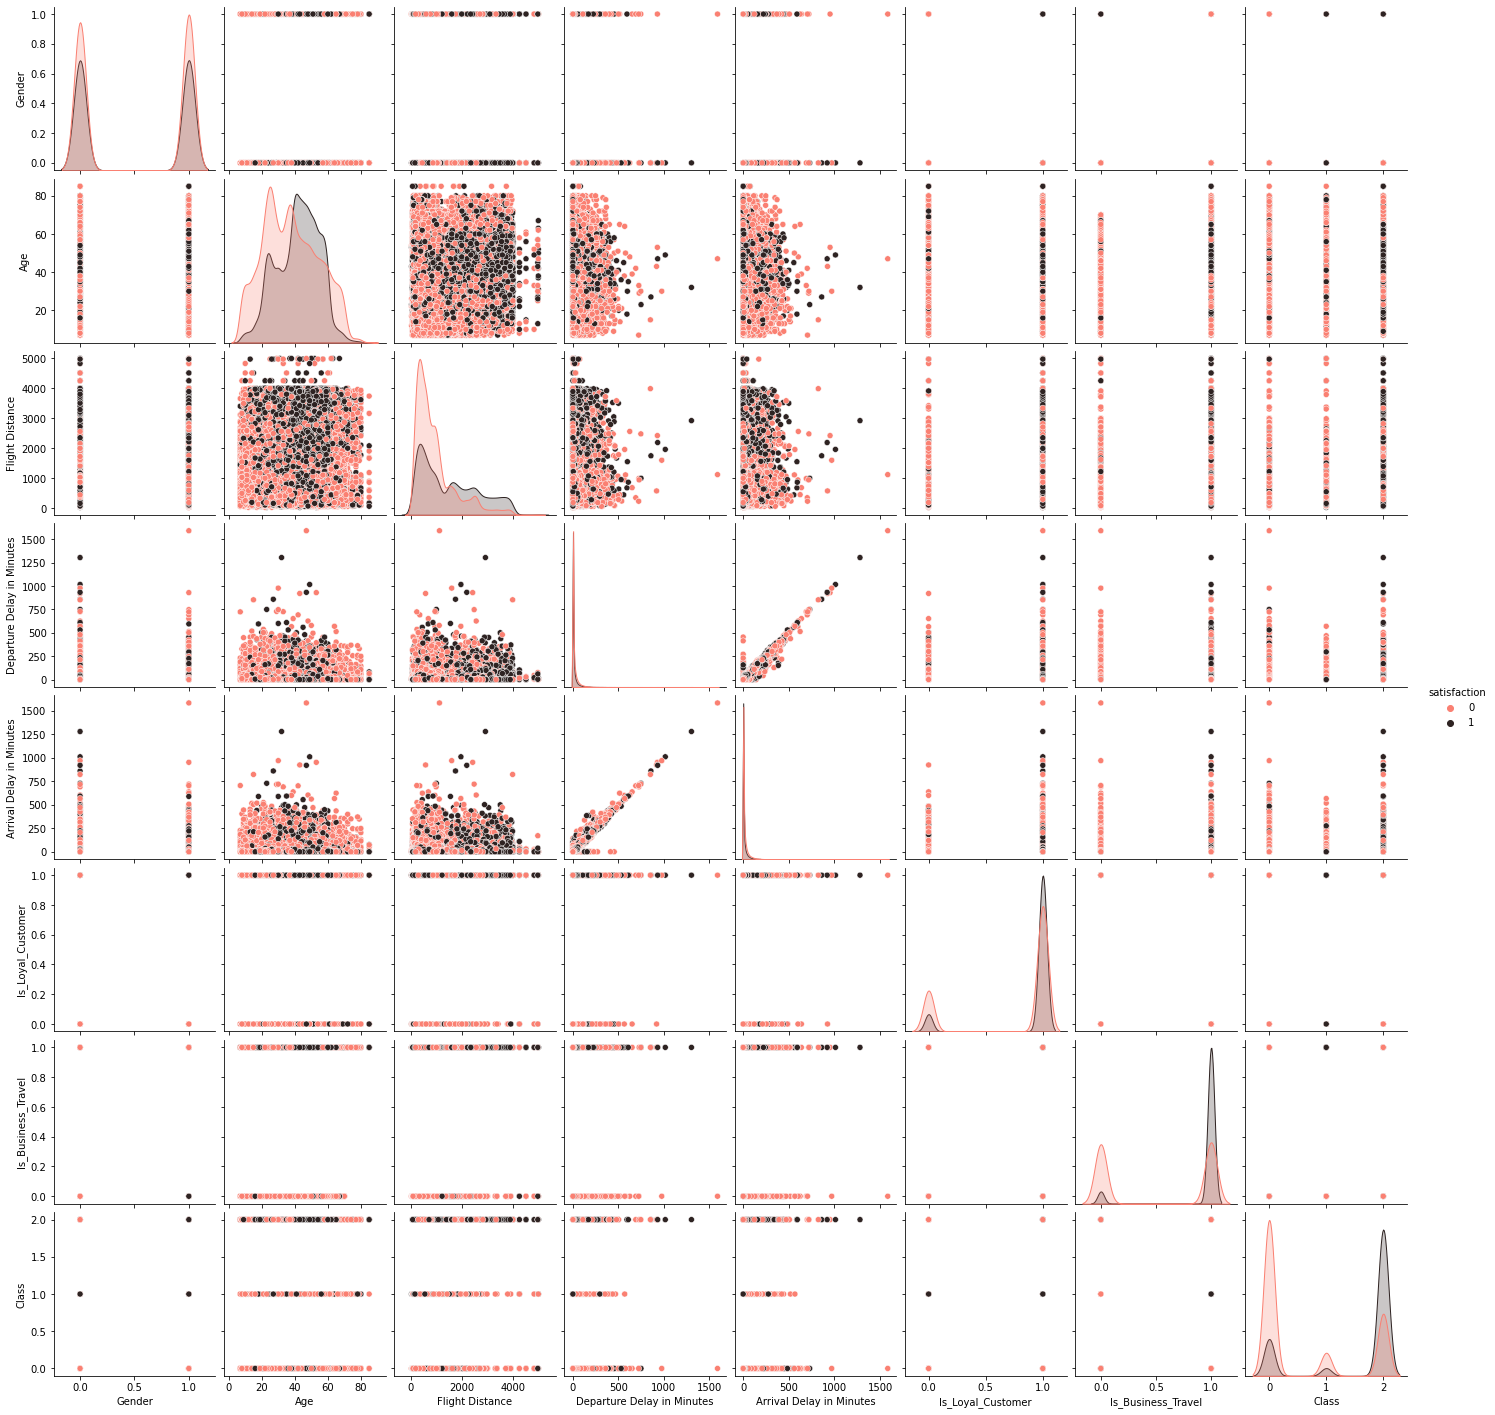

In [ ]:
sns.pairplot(nf, hue = 'satisfaction', palette = "dark:salmon_r")

#### Cluster based on (Arrival Delay, Departure Delay)



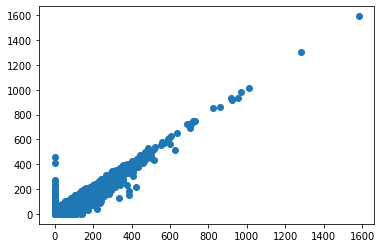

In [ ]:
#Can help investigate how different length and combinations of delays can affect people's satifaction; 
#and given correlation of these variables with satisfaction was already low, see if combination of them might be useful

plt.scatter(x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes', data = new_df)

In [ ]:
cl_df = new_df.loc[:, ['Arrival Delay in Minutes', 'Departure Delay in Minutes']]

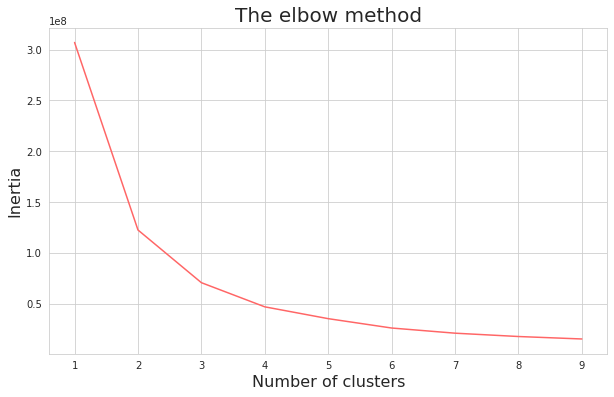

In [ ]:
sns.set_style('whitegrid')

from sklearn.cluster import KMeans

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(cl_df)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('The elbow method', fontsize = 20)
ax.set_ylabel('Inertia', fontsize = 16)
ax.set_xlabel('Number of clusters', fontsize = 16)
plt.plot(range(1, 10), inertia, color = '#FF6666' )

#from elbox method, choosing 4 clusters look appropriate

88362
495
3253
11794


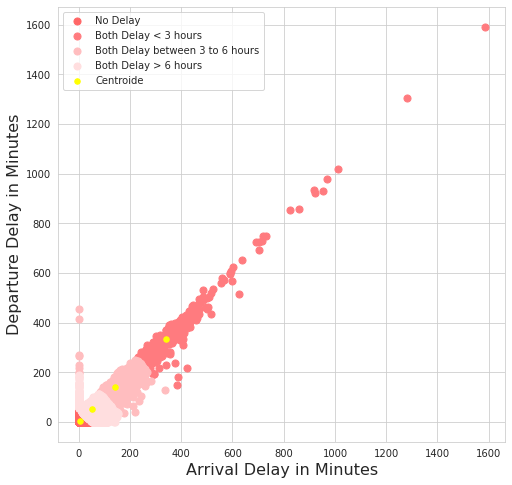

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, #adjest n_clusters based on the num of clusters selected
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cl_df) #predicting and labeling the clusters

print(sum(y_kmeans == 0)) #red, no delay
print(sum(y_kmeans == 1)) #purple, both delay less than 3 hours
print(sum(y_kmeans == 2)) #green, Departure delay 3 hours to 5 hours, Arrival Delay 3 hours to 6 hours
print(sum(y_kmeans == 3)) #blue, Departure delay > 5 hours, Arrival Delay > 6 hours

plt.subplots(figsize = (8,8))
plt.scatter(cl_df.iloc[y_kmeans == 0, 0], cl_df.iloc[y_kmeans == 0, 1], s = 50,
            c = '#FF6666', label = 'No Delay')
plt.scatter(cl_df.iloc[y_kmeans == 1, 0], cl_df.iloc[y_kmeans == 1, 1], s = 50,
            c = '#FF7B7F', label = 'Both Delay < 3 hours')
plt.scatter(cl_df.iloc[y_kmeans == 2, 0], cl_df.iloc[y_kmeans == 2, 1], s = 50,
            c = '#FFBDBF', label ='Both Delay between 3 to 6 hours')
plt.scatter(cl_df.iloc[y_kmeans == 3, 0], cl_df.iloc[y_kmeans == 3, 1], s = 50,
            c = '#FFDEDF', label = 'Both Delay > 6 hours')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s = 30,
            c = 'yellow', label = 'Centroide')
plt.xlabel('Arrival Delay in Minutes', fontsize = 16)
plt.ylabel('Departure Delay in Minutes', fontsize = 16)
plt.legend()

y_kmeans
new_df['Delay_Label'] = y_kmeans #add label generated from this cluster




In [ ]:
##check mean difference###
new_df['Delay_Label'] = y_kmeans #add label generated from this cluster
new_df.groupby('Delay_Label')['satisfaction'].mean()

#It seems that only delay or not matters to passengers

Delay_Label
0    0.446878
1    0.369697
2    0.356594
3    0.355689
Name: satisfaction, dtype: float64

#### Cluster based on (Flight Distance, Arrival Delay)



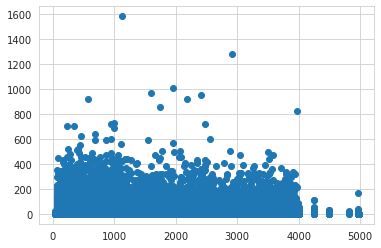

In [ ]:
#Assumption: maybe people who travel long distance may not care about delay too much. 
#See if we can cluster these types of customers out and test for our hypothesis
plt.scatter(x = 'Flight Distance', y = 'Arrival Delay in Minutes', data = new_df)

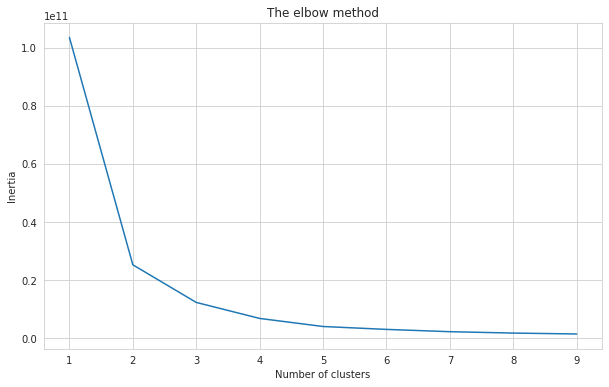

In [ ]:
cl_df1 = new_df.loc[:, ['Flight Distance', 'Arrival Delay in Minutes']]

from sklearn.cluster import KMeans

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(cl_df1)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(range(1, 10), inertia)

#from elbox method, choosing 3 clusters look appropriate

65762
15164
22978


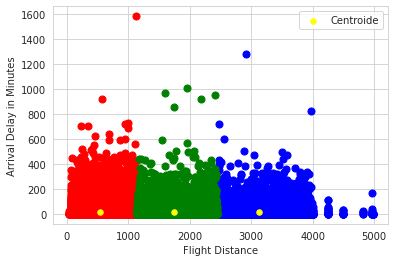

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, #adjest n_clusters based on the num of clusters selected
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cl_df1) #predicting and labeling the clusters

print(sum(y_kmeans == 0)) #red, no delay
print(sum(y_kmeans == 1)) #purple, both delay less than 3 hours
print(sum(y_kmeans == 2)) #green, Departure delay 3 hours to 5 hours, Arrival Delay 3 hours to 6 hours

plt.scatter(cl_df1.iloc[y_kmeans == 0, 0], cl_df1.iloc[y_kmeans == 0, 1], s = 50,
            c = 'red')
plt.scatter(cl_df1.iloc[y_kmeans == 1, 0], cl_df1.iloc[y_kmeans == 1, 1], s = 50,
            c = 'blue')
plt.scatter(cl_df1.iloc[y_kmeans == 2, 0], cl_df1.iloc[y_kmeans == 2, 1], s = 50,
            c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s = 30,
            c = 'yellow', label = 'Centroide')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay in Minutes')
plt.legend()

#It clustering based on flight distance basically, not intuitive



### Manual Label with categoricals

In [ ]:
###For categorical variables, clusters doesn't make sense. Can generate labels based on business meanings
#Label created for the use of making recommendations to different group (prerequisite: labels created have business meanings)

#Assumption, running machine learning algorithom for customers under different labels would generate different result. 
#So, we can give differentiated recommendations

In [ ]:
#Combination to generate user personas should come from here
#These are physical facts, feedback are subjective (e.g you have great meal but people just dislike it)


#USER PERSONA - LABEL BASED ON BEHAVIOR (Business Travel VS Class)
# 'Is_Business_Travel' == 1 and 'Class' == 2 can generate senior-managerial passenger booked for business
# 'Is_Business_Travel' == 1 and 'Class' == 1 can generate ordinary business travel passengers
# 'Is_Business_Travel' == 1 and 'Class' == 0 can generate ordinary business travel passengers (similar with above)
# 'Is_Business_Travel' == 0 and 'Class' == 2 Rich passengers, given they travel for trips but still book business class
# 'Is_Business_Travel' == 0 and 'Class' == 1 (Eco Plus) can generate travellers care more about experience
# 'Is_Business_Travel' == 0 and 'Class' == 0 ordinary travellers

#USER PERSONA - VALUE TO US (Class VS Loyalty)
# 'Class' == 2 and 'Is_Loyal_Customer' == 1 generate prime passenger. High value passengers
# 'Class' == 2 and 'Is_Loyal_Customer' == 0 generate potential high value passengers. (Rich, we want to attract them)
# 'Class' == 1 and 'Is_Loyal_Customer' == 1 Loyal customers who willing to pay extra 
# 'Class' == 1 and 'Is_Loyal_Customer' == 0 Customers have will to pay extra (cares about experience). Created good experience will keep them
# 'Class' == 0 and 'Is_Loyal_Customer' == 1 General passengers. Our fundamental. Make sure they don't churn.
# 'Class' == 0 and 'Is_Loyal_Customer' == 0 Low value customers, no need further operation on this group


#USER PERSONA - LABEL BASED ON PURPOSE (Business Travel VS Loyalty)
#Assumption is the business travel passengers would travel more frequently
# 'Is_Business_Travel' == 1 and 'Is_Loyal_Customer' == 1 Frequent passenger (potentially use our airline often)
# 'Is_Business_Travel' == 1 and 'Is_Loyal_Customer' == 0 Frequent passenger but not loyal (attracts them)
# 'Is_Business_Travel' == 0 and 'Is_Loyal_Customer' == 1 Loyal Travelers, no need further operation
# 'Is_Business_Travel' == 0 and 'Is_Loyal_Customer' == 0 Travelers don't care about airline, no need further operation



#Consider combine eco plus with eco if they share similar behaviors

Business Travel VS Class


In [ ]:
def calculate_group(Is_Business_Travel, Class): 
    if Is_Business_Travel == 1 and Class == 2: 
        group = 5 
    elif Is_Business_Travel == 1 and Class == 1: 
        group = 4 
    elif Is_Business_Travel == 1 and Class == 0: 
        group = 3 
    elif Is_Business_Travel == 0 and Class == 2: 
        group = 2 
    elif Is_Business_Travel == 0 and Class == 1: 
        group = 1
    elif Is_Business_Travel == 0 and Class == 0: 
        group = 0
    return group

In [ ]:
new_df['BTravel_Class_Label'] = new_df.apply(lambda x : calculate_group(x["Is_Business_Travel"], x["Class"]), axis=1)
new_df.groupby('BTravel_Class_Label')['satisfaction'].mean()

BTravel_Class_Label
0    0.101971
1    0.087125
2    0.122392
3    0.296194
4    0.393316
5    0.720216
Name: satisfaction, dtype: float64

Class VS Loyalty


In [ ]:
def calculate_group1(Is_Loyal_Customer, Class): 
    if Is_Loyal_Customer == 1 and Class == 2: 
        group = 5 
    elif Is_Loyal_Customer == 0 and Class == 2: 
        group = 4 
    elif Is_Loyal_Customer == 1 and Class == 1: 
        group = 3 
    elif Is_Loyal_Customer == 0 and Class == 1: 
        group = 2 
    elif Is_Loyal_Customer == 1 and Class == 0: 
        group = 1
    elif Is_Loyal_Customer == 0 and Class == 0: 
        group = 0
    return group

In [ ]:
new_df['Loyal_Class_Label'] = new_df.apply(lambda x : calculate_group1(x["Is_Loyal_Customer"], x["Class"]), axis=1)
new_df.groupby('Loyal_Class_Label')['satisfaction'].mean()

#Loyal customers, despite in diverse class, would always have higher satisfaction
#Interesting to find that in not loyal customers, people who book Eco Plus would have lower satisfaction compared to those booked Eco.
#This can be caused by the fact that these people care more about experiences, but the actual experience is below expectations

Loyal_Class_Label
0    0.139963
1    0.200195
2    0.078322
3    0.263756
4    0.395459
5    0.746201
Name: satisfaction, dtype: float64

Travel VS Loyalty


In [ ]:
def calculate_group2(Is_Business_Travel, Is_Loyal_Customer): 
    if Is_Business_Travel == 1 and Is_Loyal_Customer == 1: 
        group = 3 
    elif Is_Business_Travel == 1 and Is_Loyal_Customer == 0: 
        group = 2 
    elif Is_Business_Travel == 0 and Is_Loyal_Customer == 1: 
        group = 1 
    elif Is_Business_Travel == 0 and Is_Loyal_Customer == 0: 
        group = 0 
    return group

In [ ]:
new_df['BTravel_Loyal_Label'] = new_df.apply(lambda x : calculate_group2(x["Is_Business_Travel"], x["Is_Loyal_Customer"]), axis=1)
new_df.groupby('BTravel_Loyal_Label')['satisfaction'].mean()

##Interesting to find out that passengers who are loyal and not going for business trip are having the lowest satisfaction
#Even lower than non-loyal passengers go for non-business trip 

BTravel_Loyal_Label
0    0.158537
1    0.101387
2    0.237339
3    0.705553
Name: satisfaction, dtype: float64

In [ ]:
new_df

,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Is_Loyal_Customer,Is_Business_Travel,Delay_Label,BTravel_Class_Label,Loyal_Class_Label,BTravel_Loyal_Label
0,70172,0,13,1,460,3,4,3,1,5,...,5,25,18.0,0,1,0,0,1,3,1
1,5047,0,25,2,235,3,2,3,3,1,...,1,1,6.0,0,0,1,0,5,4,2
2,110028,1,26,2,1142,2,2,2,2,5,...,5,0,0.0,1,1,1,0,5,5,3
3,24026,1,25,2,562,2,5,5,5,2,...,2,11,9.0,0,1,1,0,5,5,3
4,119299,0,61,2,214,3,3,3,3,4,...,3,0,0.0,1,1,1,0,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,23,0,192,2,1,2,3,2,...,2,3,0.0,0,0,1,0,3,0,2
103900,73097,0,49,2,2347,4,4,4,4,2,...,4,0,0.0,1,1,1,0,5,5,3
103901,68825,0,30,2,1995,1,1,1,3,4,...,4,7,14.0,0,0,1,0,5,4,2
103902,54173,1,22,0,1000,1,1,1,5,1,...,1,0,0.0,0,0,1,0,3,0,2


#Drop unnecessary data and export cleaned data files

In [ ]:
data.drop(['Gate location','Arrival Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      103904 non-null  category
 1   Customer Type               103904 non-null  category
 2   Age                         103904 non-null  int64   
 3   Type of Travel              103904 non-null  category
 4   Class                       103904 non-null  category
 5   Flight Distance             103904 non-null  int64   
 6   Inflight wifi service       103904 non-null  category
 7   Ease of Online booking      103904 non-null  category
 8   Food and drink              103904 non-null  category
 9   Online boarding             103904 non-null  category
 10  Seat comfort                103904 non-null  category
 11  Inflight entertainment      103904 non-null  category
 12  On-board service            103904 non-null  category
 13 

In [ ]:
categorical_indexes = list(range(6, 18))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('int')
pd.get_dummies(data) # prefix=['Gender', 'Customer Type '])

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,2,2,2,2,2,5,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,4,5,5,3,3,4,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,2,2,2,2,2,3,1,...,0,1,0,0,1,1,0,0,1,0
103900,49,2347,4,4,2,4,5,5,5,5,...,1,0,1,1,0,1,0,1,0,0
103901,30,1995,1,1,4,1,5,4,3,2,...,0,0,1,0,1,1,0,1,0,0
103902,22,1000,1,1,1,1,1,1,4,5,...,0,1,0,0,1,1,0,0,1,0


In [ ]:
data.to_csv('cleaned_data.csv')

# Interpretation

After model trainings, interpretating the features with the highest importance in our models

In [ ]:
pd.options.display.float_format='{:,.2f}'.format 

In [ ]:
top5 = ['Inflight wifi service', 'Baggage handling', 'Online boarding', 'Inflight service', 'Seat comfort', 'satisfaction']

In [ ]:
#Class and BTravel
new_df.groupby('BTravel_Class_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
BTravel_Class_Label,,,,,,
0,2.52,3.60,2.77,3.62,3.17,0.10
1,2.50,3.57,2.76,3.62,3.21,0.09
2,2.55,3.34,3.24,3.33,3.46,0.12
3,2.88,3.26,2.87,3.26,3.10,0.30
4,3.01,3.17,3.01,3.17,3.16,0.39
5,2.79,3.87,3.74,3.87,3.77,0.72


In [ ]:
#Class and Loyal
new_df.groupby('Loyal_Class_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
Loyal_Class_Label,,,,,,
0,2.58,3.37,2.59,3.38,3.00,0.14
1,2.70,3.47,2.88,3.49,3.18,0.20
2,2.46,3.14,2.47,3.15,3.02,0.08
3,2.80,3.39,2.93,3.41,3.20,0.26
4,2.93,4.22,2.91,4.22,2.99,0.40
5,2.75,3.78,3.86,3.78,3.90,0.75


In [ ]:
#BTravel and Loyal
new_df.groupby('BTravel_Loyal_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
BTravel_Loyal_Label,,,,,,
0,2.63,3.73,2.48,3.78,2.98,0.16
1,2.52,3.58,2.80,3.60,3.20,0.10
2,2.71,3.69,2.71,3.70,2.99,0.24
3,2.86,3.64,3.72,3.64,3.75,0.71
